# Project: Investigate "No-Show" medical data set.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The data set under analysis here is a collection of information about more than 100k brazilizan patients
that will be analysed in the goal of deciding wether there is a possible factor/s that can be used to predict if the patient will be a no-show or not. The dependent factor in this data set is the no_show factor.
The questions that i will try to answer are:
1. Is there a strong corrleation between no_show and any of the independent factors <br>{gender, 	age, 	neighbourhood, 	scholarship, 	hypertension, 	diabetes, 	alcoholism, 	handicap 	sms_received, 	}.
1. Is there and what would be the  relation between no_show and the factors <br>{waiting days, the day of the appointment, the month of the appointment}.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties
   After loading the data the first thing to do is to try to understand the data and check for initial issues that need to be fixed in the cleaning process in order to make the exploring process as smoth as possible.

In [2]:
df = pd.read_csv('NoShow.csv',parse_dates=['ScheduledDay','AppointmentDay'])
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


In [4]:
df.duplicated().sum()

0

In [5]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


From the intial inspection we can see that there is 110527 records with 14 columns.
There is 0 duplicated rows and 0 NAN values.

The things to be fixed list:
1. columns PatientId & AppointmentId will be droped since they will make no difference in the analysis.
1. column names needs to be fixed from spelling mistakes and also put in an easier format to work with.
1. columns ScheduledDay & AppointmentDay will be formated to a datetime object type.
1. column Age has some records with negative values so they either should be dropped or changed to the mean.
1. column handicap values should be 0,1 or 2 and any other value is considered an error <br>
    so either they would be dropped or changed then the whole column values will be set to either 0 or 1.
1. column No-show values will be changed from yes-no to 1-0. 

Things to be added/changed:
1. adding a week_of_day column that contains the day of the appointment (extracted from appointmentday column).
1. adding a waiting_time column that contains the number of days between scheduling an appointment and the actulal day of the appointment.
1. add a month column that contains the month of the appointment ( extracted from appointmentday column).


### Data Cleaning 

#### First step
 - Drop the columns that will take no place in the analysis process.

In [7]:
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)
df.head(2)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No


#### Second Step 
 - Fixing the spelling mistakes in columns names and changing them to lower case.

In [8]:
labels = {'Hipertension':'hypertension', 'Handcap':'handicap', 'No-show':'no_show', 'SMS_recieved':'sms'}
df.rename(columns=labels, inplace=True)

In [9]:
df.columns = df.columns.map(lambda x : x.lower())
df.head(2)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No


####  Third Step
> **Note**: this step was to change the columns ScheduledDay & AppointmentDay from string type to datetime type but it was already done in the importing of the dataframe from the csv file using the keyword (parse_date).

#### Fourth Step
 - checking the negative values in the age column.

In [10]:
df.query('age < 0')

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
99832,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


- since it's only one record i will choose to drop it from the dataset.

In [11]:
df.drop(99832, inplace=True)
df.age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

#### Fifth Step
 - Acording to the creator of the data set the handicap column should be a binary column of 0 or 1 but instead it has the values between 0 & 4.
 - To fix this issue we will either change all values above 1 to 1 or we will drop them from the dataset.

In [12]:
df.handicap.value_counts(bins=[0,1,4])

(-0.001, 1.0]    110327
(1.0, 4.0]          199
Name: handicap, dtype: int64

 - We can see that there is only 199 records with issues in there values so i will choose to drop them.

In [13]:
df.drop(df.query('handicap > 1').index, axis=0, inplace=True)
df.handicap.unique()

array([0, 1])

####  6th Step
 - Changing the values of the no_show column from yes - no to 1 - 0 where 1 refere to the patient not showing.

In [14]:
df.no_show.unique()

array(['No', 'Yes'], dtype=object)

In [15]:
df.no_show.replace({'No':0 ,'Yes':1},inplace=True)
df.no_show.unique()

array([0, 1])

#### 7th Step
- adding the week_of_day column.

In [16]:
# the datetime.weekday() in this pandas version returns a number istead of a string with monday as 0 ...
days = ['monday', 'thuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']
df['day_of_week'] = df.appointmentday.apply(lambda x: days[x.weekday()])
df.day_of_week.unique()

array(['friday', 'thuesday', 'monday', 'wednesday', 'thursday',
       'saturday'], dtype=object)

#### 8th Step.
 - add the month collumn.

In [17]:
months = ['January', 'February', 'March', 'April', 'May',
          'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['month'] = df.appointmentday.apply(lambda x: months[x.month])
df.month.unique()

array(['May', 'June', 'July'], dtype=object)

#### The One before Last Step
- creating a waiting_days column that includes the num of days between schedulingday & appointmentday columns.

In [18]:
df['waiting_days'] = (df['appointmentday'] - df['scheduledday']).dt.days
df.waiting_days.describe()

count    110327.000000
mean          9.186971
std          15.257836
min          -7.000000
25%          -1.000000
50%           3.000000
75%          14.000000
max         178.000000
Name: waiting_days, dtype: float64

> we can see that there is some records with negative values which can't be realistic so let's see if we can drop them without affecting the analysis data set.

In [19]:
df.query('waiting_days < 0').shape

(38490, 15)

> With nearly 38k records having negative days dropping those records would have a huge effect on the analysis.<br>
> Since i don't have an affective method to fix this issue in the current time I will separate the waiting_days analysis from the rest of the analysis so I can drop records with negative valuse without affecting other features.

In [20]:
df_waiting = df[['waiting_days', 'no_show']].copy()
df_waiting.head(2)

,waiting_days,no_show
0,-1,0
1,-1,0


In [21]:
df_waiting.drop(df_waiting.query('waiting_days < 0').index,inplace=True)
df_waiting.describe()

,waiting_days,no_show
count,71837.000000,71837.000000
mean,14.645252,0.285159
std,16.496611,0.451493
min,0.000000,0.000000
25%,3.000000,0.000000
50%,8.000000,0.000000
75%,21.000000,1.000000
max,178.000000,1.000000


In [22]:
df.drop(columns = 'waiting_days', inplace=True)
df.head(2)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,day_of_week,month
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,friday,May
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,friday,May


#### One Last Step
- Since we extracted the important information from the scheduledday & appointmentday columns i will now drop them.

In [23]:
df.drop(columns=['scheduledday','appointmentday'], inplace = True)

In [24]:
# getting the column names as a list to reorder them making no_show the last column
cols = list(df.columns)
# reordering the list 
cols = cols[:-3]+cols[-2:]+[cols[-3]]
#creating the new view of the dataframe
df = df[cols]
df.head(2)

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,day_of_week,month,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,friday,May,0
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,friday,May,0


### The DataFrame in it's final form

In [25]:
df.head(2)

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,day_of_week,month,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,friday,May,0
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,friday,May,0


In [26]:
df.tail(2)

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,day_of_week,month,no_show
110525,F,38,MARIA ORTIZ,0,0,0,0,0,1,thuesday,July,0
110526,F,54,MARIA ORTIZ,0,0,0,0,0,1,thuesday,July,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110327 entries, 0 to 110526
Data columns (total 12 columns):
gender           110327 non-null object
age              110327 non-null int64
neighbourhood    110327 non-null object
scholarship      110327 non-null int64
hypertension     110327 non-null int64
diabetes         110327 non-null int64
alcoholism       110327 non-null int64
handicap         110327 non-null int64
sms_received     110327 non-null int64
day_of_week      110327 non-null object
month            110327 non-null object
no_show          110327 non-null int64
dtypes: int64(8), object(4)
memory usage: 15.9+ MB


In [28]:
#the dataframe that will be used in the waiting_days analysis
df_waiting.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71837 entries, 5 to 110526
Data columns (total 2 columns):
waiting_days    71837 non-null int64
no_show         71837 non-null int64
dtypes: int64(2)
memory usage: 1.6 MB


<a id='eda'></a>
## Exploratory Data Analysis

> Before i start i will create helping function that i will use to calculate the precentage of no_show patients relative to the total number of patients in each group <br>ex the % of no_show patients in a month relative to the total number of patients in that same month and not the whole year.

In [75]:
def plot_precentage(x,y,hue, orient = False, title='',
                    xlabel='',ylabel='',figsize=(5,4),
                    ticks = None,tick_labels = None):
    
    count = df[x].groupby(df[hue]).value_counts(sort=False).rename(y)
    count_show = count[0]
    count_no_show = count[1]
    precentage = [i/(i+x)*100 for i,x in zip(count_no_show,count_show)]
    plt.figure(figsize=figsize, dpi=80)
    if not ticks:
        ticks = count_show.index
    if not orient:
        plt.bar(x=ticks, height=precentage, tick_label = tick_labels);
    else:
        plt.barh(y=ticks, width=precentage, tick_label = tick_labels);
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)


### Research Question 1: Is there a strong correlation between the no_show factor and other factors?

I will check for correlation or similarity in behaviour with to checks first the histogram of the factors and then the correlation method.

,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
scholarship,1.000000,-0.019241,-0.024612,0.035224,-0.009192,0.001202,0.029391
hypertension,-0.019241,1.000000,0.432264,0.088087,0.081366,-0.006238,-0.036176
diabetes,-0.024612,0.432264,1.000000,0.018634,0.054716,-0.014782,-0.015169
alcoholism,0.035224,0.088087,0.018634,1.000000,0.003118,-0.026080,-0.000245
handicap,-0.009192,0.081366,0.054716,0.003118,1.000000,-0.024031,-0.007762
sms_received,0.001202,-0.006238,-0.014782,-0.026080,-0.024031,1.000000,0.126678
no_show,0.029391,-0.036176,-0.015169,-0.000245,-0.007762,0.126678,1.000000


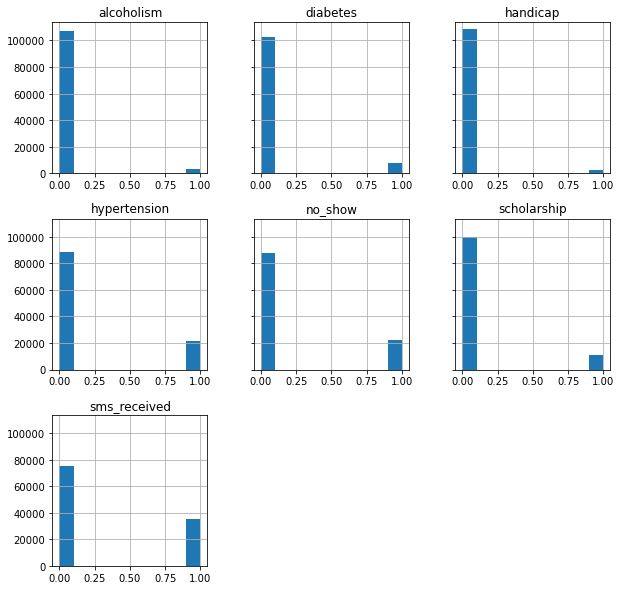

In [46]:
df.loc[ : , 'scholarship':].hist(figsize=(10,10 ), sharey=100000);
df.loc[ : , 'scholarship':].corr()

#### result
- We can see from both the graph and the table that there is a very week correlation between no_show and the other factors.
- There is a Strong correlation between hypertension & diabetes.


- The relation between recieving an sms and showing up needs more investigation.

### Research Question 2 : Is there a relation between receiving an sms and not showing up?

>**Note**:
>   - Acording to the dataset creator the sms column should contain the number of the sms sent to the patient but the column only contains values of 0 & 1 so we will treat it as a binary column indicating weather the patient received an sms or not.
>   - This would add a limit on the investigation of this factor since we can't correlate the no.of sms messages received by the patient and the patient being a no_show or no.

In [30]:
df.no_show.corr(df.sms_received)

0.12667820678971023

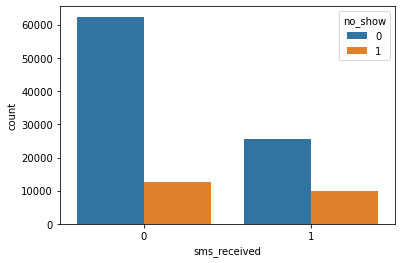

In [31]:
sns.countplot(x='sms_received', data = df, hue='no_show');

The graph shows that the higher precentage of patients that showed actually didn't receive an sms, but it doesn't show the effect of receiving an sms on the ratio of no_show so a graph using precentage will be much clearer.

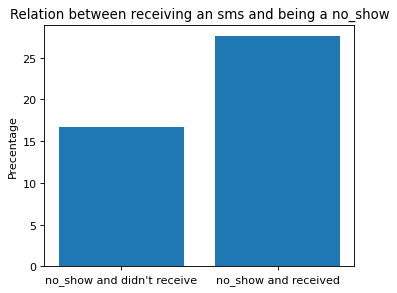

In [64]:
tick = ["no_show and didn't receive","no_show and received"]
x, y,hue = 'sms_received','precentage','no_show'
title = "Relation between receiving an sms and being a no_show"
ylabel = "Precentage"
plot_precentage(x,y,hue,title = title, ylabel = ylabel, tick_labels = tick, ticks=[1,2])

#### Result:
 - We can now see that although the higher precantage of patients who showed up didn't receive an sms, the precantage of those who didn't show and received an sms is higher than those who didn't show and didn't receive an sms.

### Research Question 3 : Is there a relation between the age and being a no_show patient?

To answer this question i will divide the ages of the dataset into groups.
then i will graph a relation between the groups and the no_show column.

In [33]:
label = ['0-18', '18-30', '30-40', '40-50', '50-60', '60-70', '70-120']
df['age_bin'] = pd.cut(df['age'],bins=[0,18,30,40,50,60,70,120],labels = label)
df.head(2)

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,day_of_week,month,no_show,age_bin
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,friday,May,0,60-70
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,friday,May,0,50-60


Now i will plot the age groups count relative to the no_show count

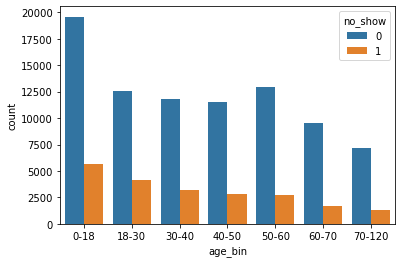

In [34]:
sns.countplot(x='age_bin', data=df, hue='no_show', );

Now i will calculate the precentage of the no_show in each age group.

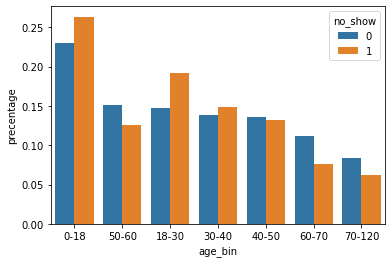

In [35]:
x, y , hue = "age_bin","precentage", "no_show"
count = df[x].groupby(df[hue]).value_counts(normalize=True).rename(y).reset_index()
count.pipe((sns.barplot, "data"), x=x, y=y, hue=hue);

- We can see that the age_bin "0-18" has both the highest count of patients and also the highest precentage of no_show patients

Now i will calculate the precentage of the no_show patients relative to each bin and no relative to the whole dataset as in the above graph.

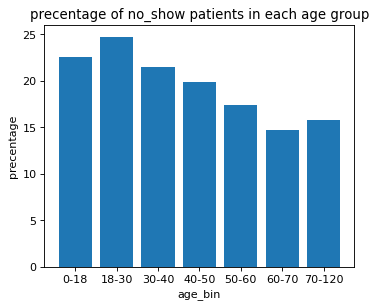

In [76]:
x, y , hue = "age_bin","count", "no_show"
title = "precentage of no_show patients in each age group"
xlabel = 'age_bin'
ylabel = 'precentage'
plot_precentage(x,y,hue,title = title, xlabel= xlabel, ylabel= ylabel)

#### Result:
 - We can see that although the age group between 0 & 18 has both the highest number of patients and the highest number of no_show patients yet the age group between 18 & 30 has the highest rate of no_show patients which means that it's more likely for patients between 18 & 30 to be a no_show patient.

### Research Question 4: Is there a relation between the neighbourhood and the no_show patient?

I will calculate the precentage of no_show patients in every neighbourhood relative to the total number of patients in that neighbourhood

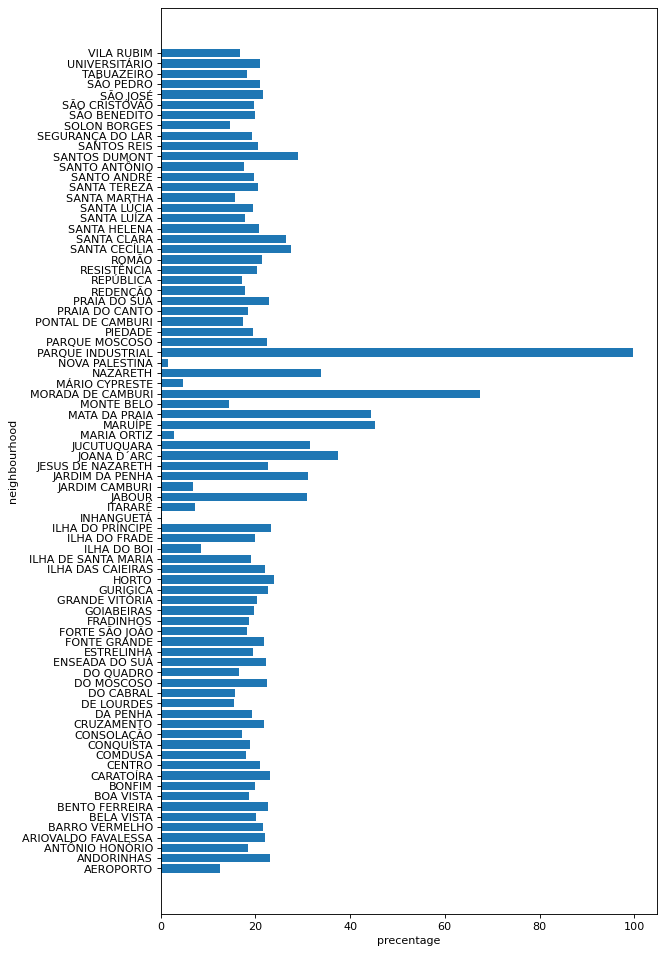

In [77]:
x, y, hue = 'neighbourhood', 'precentage', 'no_show'
plot_precentage(x,y,hue,figsize=(8,15),orient=True,ylabel=x,xlabel=y)

#### Result:
- We can see that patients from "PARQUE INDUSTRIAL" neighbourhood are more likly to be a no_show patient than patients from other neighbourhoods.

### Research Question 5: Is there a relation between the number of waiting days and the no_show patients?

I will divide the data into five different groups (0-5, 5-10, 10-20,20-30, 30-max no of days) and then I will check to see which one is more likely to cause a no_show patient.

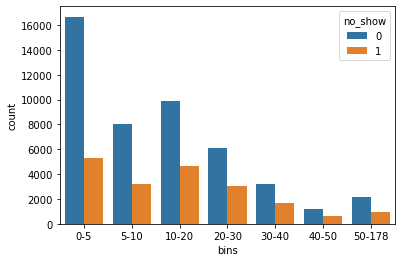

In [39]:
#### First creating the bins
max_no_days = df_waiting.waiting_days.max()
label = ['0-5', '5-10', '10-20', '20-30', '30-40', '40-50', '50-%d'%max_no_days]
bins =[0, 5, 10, 20, 30, 40, 50, max_no_days]
df_waiting['bins'] = pd.cut(df_waiting.waiting_days, bins=bins, labels = label)
sns.countplot(x='bins',data=df_waiting,hue='no_show');

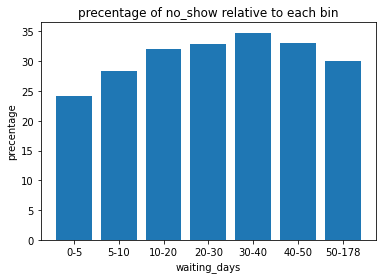

In [40]:
#Second calculating the precentage of the no_show in each bin relative to the total patients in that bin.
# here i can't use the helping function since it will show the column "5-10" in the wrong order.
count = df_waiting.bins.groupby(df_waiting.no_show).value_counts(sort = False)
count_show = count[0]
count_no_show = count[1]
precentage =[i/(i+x)*100 for i,x in zip(count_no_show,count_show)]
# fixing the sorting issue which leads to showing the 5-10 bin out of its place.
precentage = [precentage[0]]+[precentage[-2]]+precentage[1:-2]+[precentage[-1]]
#plotting
plt.bar(x=label, height=precentage)
plt.title("precentage of no_show relative to each bin")
plt.xlabel("waiting_days")
plt.ylabel("precentage");

#### Result:
- We can see that patients with waiting days between 0 & 5 are the least likely to be no_show patients and that patients between 30 & 40 days are the most likely to be no_show patients.

### Research Question 6: Is there a relation between the weekday and the no_show patients?

wednesday    25824
thuesday     25584
monday       22678
friday       18985
thursday     17217
saturday        39
Name: day_of_week, dtype: int64

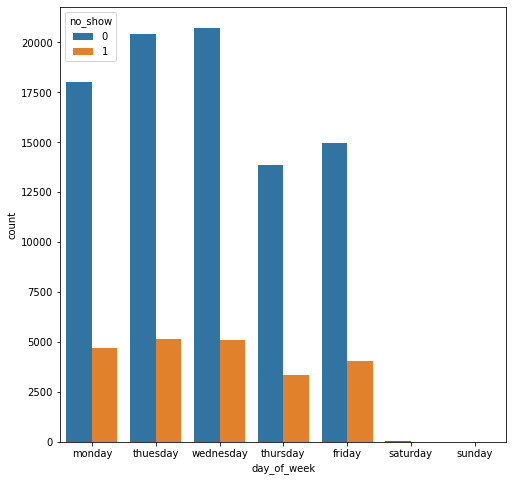

In [41]:
plt.figure(figsize=(8,8))
sns.countplot(x='day_of_week', data=df, hue="no_show",order=days);
df.day_of_week.value_counts()

We can see that both wednesday and thuesday the highest number of patients and that saturday and sunday got the lowest number of patients.

Now i will calculate the precentage of no_show patients relative to each day.

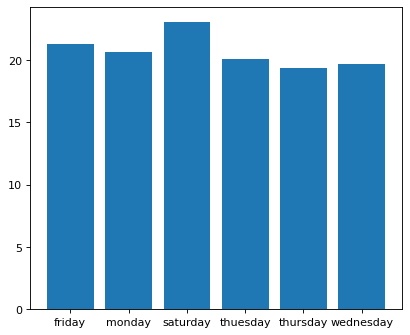

In [78]:
x,y,hue = 'day_of_week','precentage','no_show'
plot_precentage(x,y,hue,figsize=(6,5))

#### Result:
- We can see that although saturday has the lowest number of patients yet it has the highest rate of no_show patients with friday coming second in place.

### Research Question 7: Is there a relation between the month and the no_show patients?

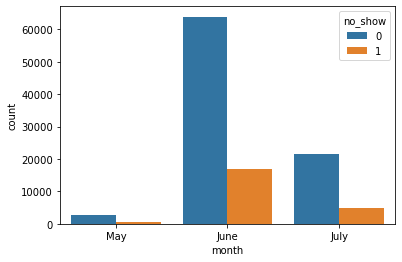

In [43]:
sns.countplot(x='month', data=df, hue="no_show");

The dataset contains only three months may, june and july with june having the highest number of patients.

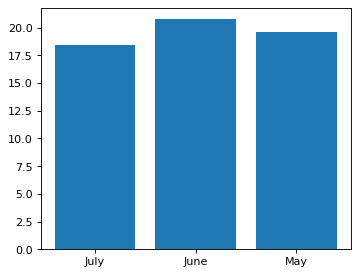

In [70]:
x,y,hue = 'month','precentage','no_show'
plot_precentage(x,y,hue)

#### Result:
- We can't really say whether june is the month with the highest rate of no_show patients or not since the dataset contains information about the patients of only 3 month and not the whole year.

<a id='conclusions'></a>
## Conclusions

#### Limitations:


> 1. The data was collected on a period of 3 month only which made the time analysis less effiecent since we can't for example know whether the month with the highest rate of no_show is really that or was it just in the group of those three months.
>1. The appointment day didn't include the hour of the appointment which could have been useful in checking different questions like whether that patient was no show because the appointment hour was in working hour periods or not and so on.
>1. The sms_recieved column contained binary values of 0 & 1 so i couldn't check whether the rate of no_show had a relation with the number of sms messages received or not.
>1. The waiting_days had some negative values due to having schedule days that are after appointment days which led to a decrease in the data sample to be analyzed by about 35k record.
>1. Other features like the weather at the day of the appointment or the traffic from the neighbourhood to the hospital in that day could add more ways to determine a no_show patient.

#### Final Conclusions:

> **There is no one factor that can determine whether the patient will not show or not but a combination of features can give an indication that the patient has a higher possibllity to not show .**
> 1. The patient between 18 & 30 years has a higher possiblity to no show than other ages.
> 1. The patient with waiting days less than 6 days has a higher possibility to show to the appointment.
> 1. The patient with appointment day in saturday/friday has a higher possibility to not show.
> 1. The patient with appointment day in june has a higher possibility to not show than other months.
> 1. The patient from "PARQUE INDUSTRIAL" neighbourhood has a higher possibility to not show.